# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress
import scipy.stats as st

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy


### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 597


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | quiberon
Processing Record 2 of Set 1 | weno
Processing Record 3 of Set 1 | rustaq
Processing Record 4 of Set 1 | puerto escondido
Processing Record 5 of Set 1 | richards bay
Processing Record 6 of Set 1 | waitangi
Processing Record 7 of Set 1 | jamestown
Processing Record 8 of Set 1 | port mathurin
Processing Record 9 of Set 1 | port-aux-francais
Processing Record 10 of Set 1 | petropavlovsk-kamchatsky
Processing Record 11 of Set 1 | acapulco de juarez
Processing Record 12 of Set 1 | mugia
Processing Record 13 of Set 1 | thompson
Processing Record 14 of Set 1 | albany
Processing Record 15 of Set 1 | puerto natales
Processing Record 16 of Set 1 | utrik
Processing Record 17 of Set 1 | st. john's
Processing Record 18 of Set 1 | atafu village
Processing Record 19 of Set 1 | fuvahmulah
City not found. Skipping...
Processing Record 20 of Set 1 | chifeng
Processing Record 21 of Set 1 | edinburgh of the

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()


City          566
Lat           566
Lng           566
Max Temp      566
Humidity      566
Cloudiness    566
Wind Speed    566
Country       566
Date          566
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,quiberon,47.4841,-3.1196,18.93,80,12,3.13,FR,1687905134
1,weno,7.4515,151.8468,27.97,89,100,2.06,FM,1687905134
2,rustaq,23.3908,57.4244,30.66,70,100,2.14,OM,1687905134
3,puerto escondido,15.8500,-97.0667,32.46,55,20,5.14,MX,1687905135
4,richards bay,-28.7830,32.0377,17.00,93,2,1.54,ZA,1687904959


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,quiberon,47.4841,-3.1196,18.93,80,12,3.13,FR,1687905134
1,weno,7.4515,151.8468,27.97,89,100,2.06,FM,1687905134
2,rustaq,23.3908,57.4244,30.66,70,100,2.14,OM,1687905134
3,puerto escondido,15.8500,-97.0667,32.46,55,20,5.14,MX,1687905135
4,richards bay,-28.7830,32.0377,17.00,93,2,1.54,ZA,1687904959


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

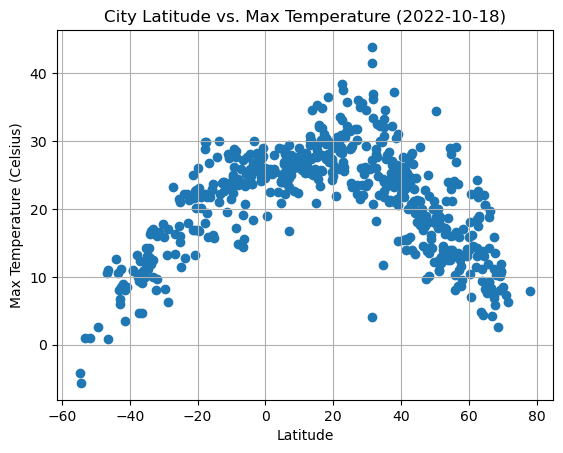

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (2022-10-18)")
plt.ylabel("Max Temperature (Celsius)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

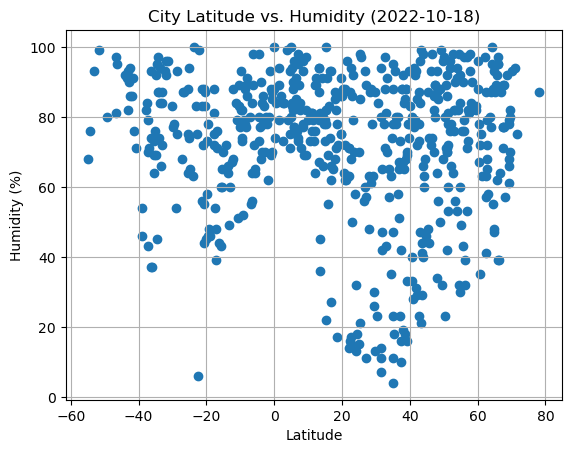

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2022-10-18)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

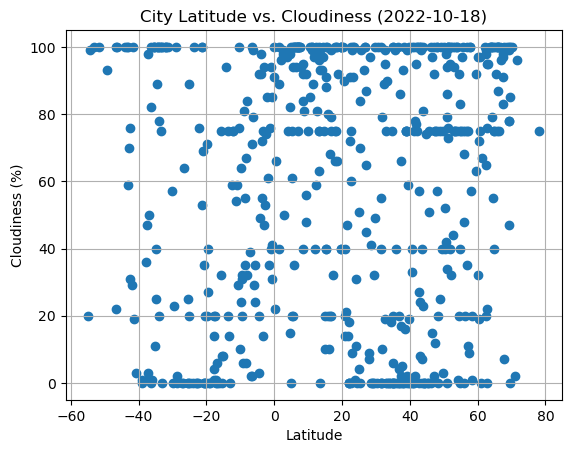

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2022-10-18)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

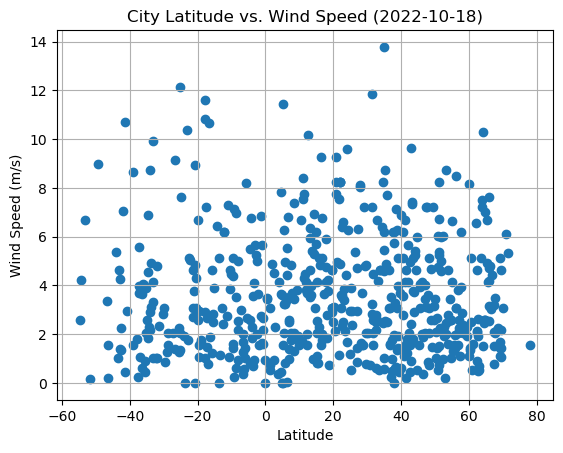

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2022-10-18)")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def lin_reg(x_values, y_values):
        (slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
        regress_values = x_values * slope + intercept
        line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
        plt.scatter(x_values,y_values)
        plt.plot(x_values,regress_values, "r-")
        print(line_eq)
        return lin_reg

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] > 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,quiberon,47.4841,-3.1196,18.93,80,12,3.13,FR,1687905134
1,weno,7.4515,151.8468,27.97,89,100,2.06,FM,1687905134
2,rustaq,23.3908,57.4244,30.66,70,100,2.14,OM,1687905134
3,puerto escondido,15.8500,-97.0667,32.46,55,20,5.14,MX,1687905135
6,jamestown,42.0970,-79.2353,20.01,85,100,5.66,US,1687904908


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
4,richards bay,-28.7830,32.0377,17.00,93,2,1.54,ZA,1687904959
5,waitangi,-43.9535,-176.5597,12.68,92,100,5.36,NZ,1687905135
7,port mathurin,-19.6833,63.4167,22.38,58,71,2.97,MU,1687905135
8,port-aux-francais,-49.3500,70.2167,2.60,80,93,8.97,TF,1687905135
14,puerto natales,-51.7236,-72.4875,0.93,99,100,0.18,CL,1687905136


###  Temperature vs. Latitude Linear Regression Plot

y = -0.27x + 31.97


<function __main__.lin_reg(x_values, y_values)>

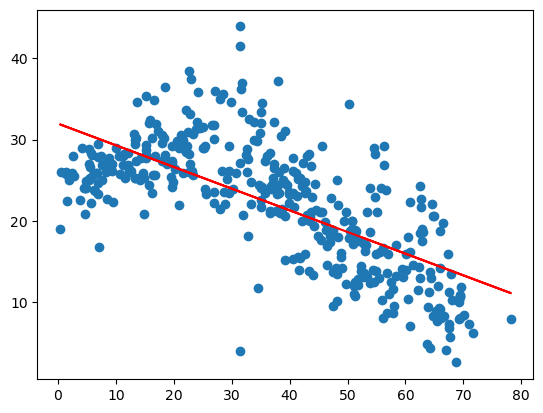

In [15]:
# Linear regression on Northern Hemisphere
result = lin_reg(northern_hemi_df["Lat"],northern_hemi_df["Max Temp"])
result

y = 0.46x + 28.25


<function __main__.lin_reg(x_values, y_values)>

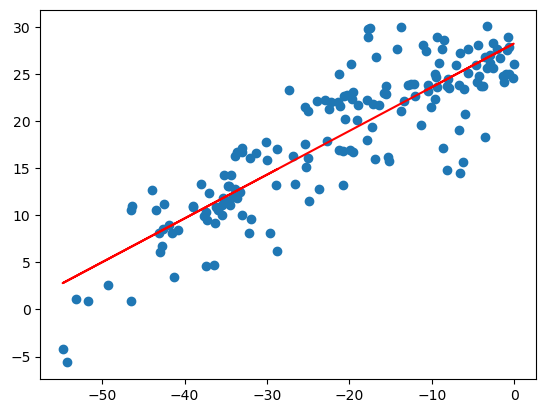

In [16]:
# Linear regression on Southern Hemisphere
result = lin_reg(southern_hemi_df["Lat"],southern_hemi_df["Max Temp"])
result

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

y = -0.04x + 72.25


<function __main__.lin_reg(x_values, y_values)>

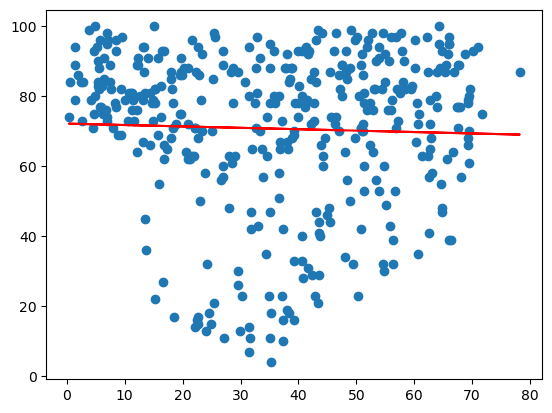

In [17]:
# Northern Hemisphere
result = lin_reg(northern_hemi_df["Lat"],northern_hemi_df["Humidity"])
result

y = -0.09x + 73.24


<function __main__.lin_reg(x_values, y_values)>

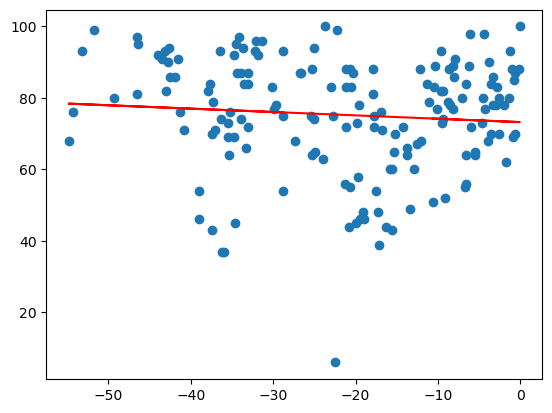

In [18]:
# Southern Hemisphere
result = lin_reg(southern_hemi_df["Lat"],southern_hemi_df["Humidity"])
result

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

y = -0.04x + 62.36


<function __main__.lin_reg(x_values, y_values)>

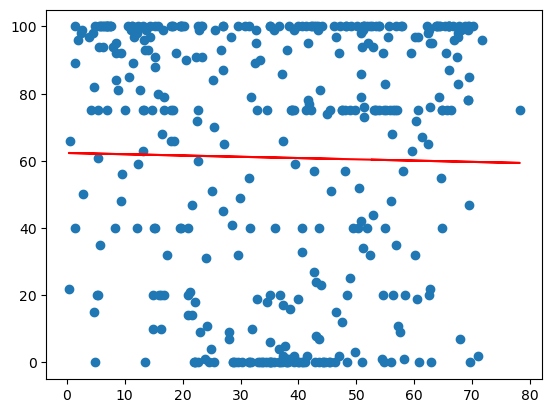

In [19]:
# Northern Hemisphere
result = lin_reg(northern_hemi_df["Lat"],northern_hemi_df["Cloudiness"])
result

y = -0.09x + 73.24


<function __main__.lin_reg(x_values, y_values)>

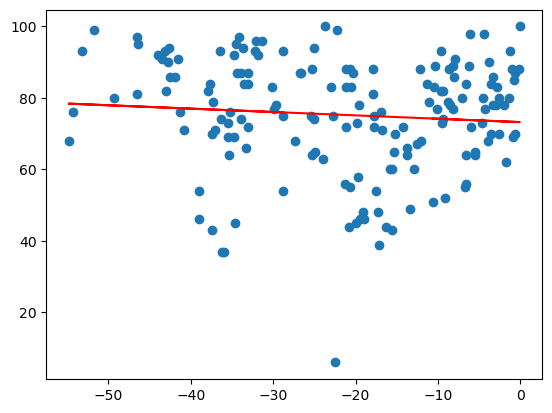

In [20]:
# Southern Hemisphere
result = lin_reg(southern_hemi_df["Lat"],southern_hemi_df["Humidity"])
result

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

y = -0.01x + 3.94


<function __main__.lin_reg(x_values, y_values)>

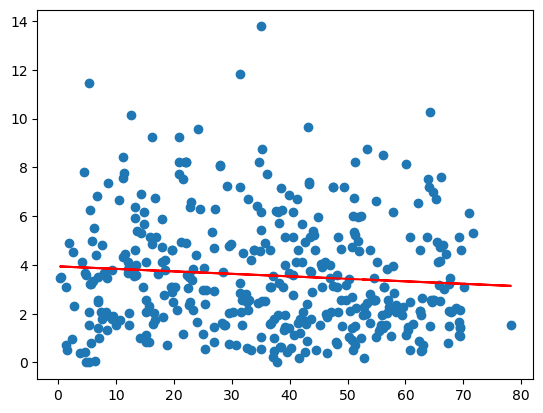

In [21]:
# Northern Hemisphere
result = lin_reg(northern_hemi_df["Lat"],northern_hemi_df["Wind Speed"])
result

y = -0.01x + 3.23


<function __main__.lin_reg(x_values, y_values)>

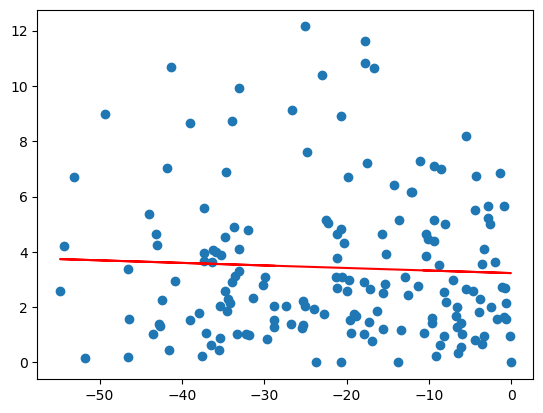

In [22]:
# Southern Hemisphere
result = lin_reg(southern_hemi_df["Lat"],southern_hemi_df["Wind Speed"])
result

**Discussion about the linear relationship:** YOUR RESPONSE HERE